# Sentiment Analysis

Dataset = reviews.csv, columns=(headline, reviewbody, ratingvalue), shape = 325,3

In [101]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews.csv')
df = data.copy() #creating a copy of original dataset and using it for the process

In [103]:
df


,headline,reviewBody,ratingValue
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0
...,...,...,...
320,Dell Latitude 7440 Ultralight Review: A solid ...,Dell's Latitude 7440 Ultralight 2-in-1 impress...,NaN
321,Dell Latitude 7440 Ultralight Review: A solid ...,Dell's Latitude 7440 Ultralight 2-in-1 impress...,NaN
322,Dell Latitude 7440 Ultralight Review: A solid ...,Dell's Latitude 7440 Ultralight 2-in-1 impress...,NaN
323,Dell Latitude 7440 Ultralight Review: A solid ...,Dell's Latitude 7440 Ultralight 2-in-1 impress...,NaN


In [104]:
df.shape

(325, 3)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   headline     325 non-null    object 
 1   reviewBody   325 non-null    object 
 2   ratingValue  319 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.7+ KB


In [106]:
df.isnull().sum() #there are 6 null values in the ratingValue column

headline       0
reviewBody     0
ratingValue    6
dtype: int64

In [107]:
df.duplicated().sum() #there are 19 duplicate rows in the dataset

19

In [108]:
df.drop_duplicates(inplace=True,keep='first') #dropping the duplicate rows keeping the first row

In [109]:
df.isnull().sum()

headline       0
reviewBody     0
ratingValue    1
dtype: int64

In [110]:
df[df['ratingValue'].isnull()]

,headline,reviewBody,ratingValue
319,Dell Latitude 7440 Ultralight Review: A solid ...,Dell's Latitude 7440 Ultralight 2-in-1 impress...,NaN


In [111]:
df.dropna(inplace=True) #dropping the null values

In [112]:
df.shape

(305, 3)

ratingValue
5.0    196
4.0     64
3.0     18
1.0     17
2.0     10
Name: count, dtype: int64


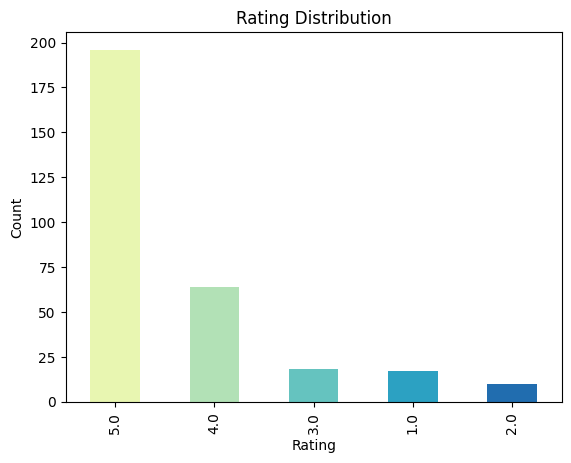

In [113]:
print(df['ratingValue'].value_counts())
df['ratingValue'].value_counts().plot(kind='bar',color = sns.color_palette('YlGnBu')) #bar graph to check the distribution of the values
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

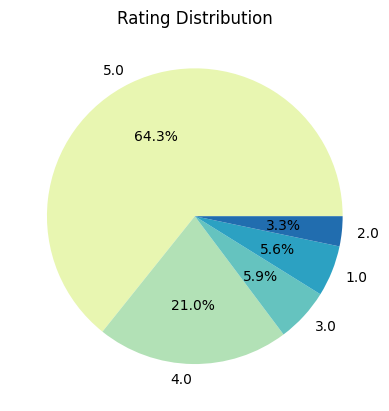

In [114]:
pallete_color = sns.color_palette('YlGnBu')
plt.pie(df['ratingValue'].value_counts(),labels=df['ratingValue'].value_counts().index,autopct='%1.1f%%',colors=pallete_color) #pie chart to check the distribution of the ratingvale values
plt.title('Rating Distribution')
plt.show()

In [115]:
#creating a new column pos_or_neg (1,0)
#sentiment 1 = Positive(5.0,4.0,3.0) , 0 = Negative(2.0,1.0)
df['pos_or_neg'] = df['ratingValue'].apply(lambda x: 1 if x in [5.0,4.0,3.0] else 0)


In [116]:
df

,headline,reviewBody,ratingValue,pos_or_neg
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0,1
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0,1
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0,1
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0,1
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0,1
...,...,...,...,...
300,Faulty motherboard,Dell sent me a laptop with a faulty motherboard,1.0,0
301,Dead on arrival,"Laptop dead on arrival, still waiting on a rep...",1.0,0
302,Bad Quality,"Bad Quality, overheating, and keyboard/trackpa...",1.0,0
303,Hassles with installation of Win 11,Laptop did not come with the required security...,1.0,0


In [117]:
df['pos_or_neg'].value_counts() #valuecounts for positive = 278 and negative = 28

pos_or_neg
1    278
0     27
Name: count, dtype: int64

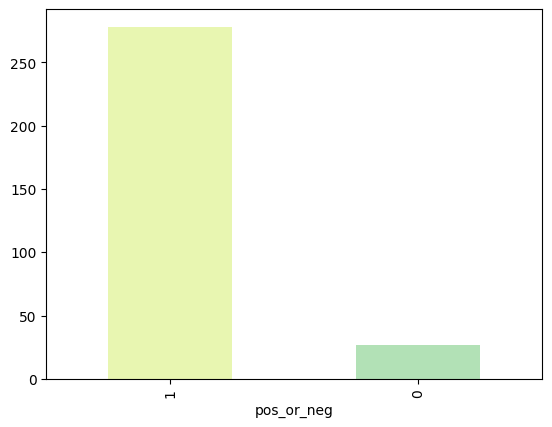

In [118]:
df['pos_or_neg'].value_counts().plot(kind='bar',color=pallete_color) #bargraph for positive and negative
plt.show()

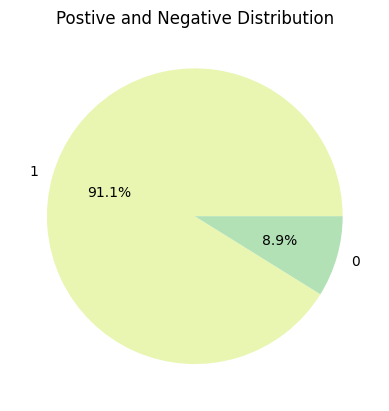

In [119]:
#pie chart for positive and negative with percentage distribution
plt.pie(df['pos_or_neg'].value_counts(),labels=df['pos_or_neg'].value_counts().index,autopct='%1.1f%%',colors=pallete_color)
plt.title('Postive and Negative Distribution')
plt.show()

In [120]:
df['Headline_ReviewBody'] = df['headline'] + ' ' + df['reviewBody'] #joining both the columns headline and reviewBody as one for futher analysis

In [121]:
df

,headline,reviewBody,ratingValue,pos_or_neg,Headline_ReviewBody
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0,1,Super light and efficient laptop Super light a...
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0,1,NEW laptop is great so far I am loving the new...
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0,1,Lightweight powerhouse. Great build quality \ ...
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0,1,Great Laptop for Work Excellent laptop for wor...
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0,1,"Practical Solid Laptop So far so good, I like ..."
...,...,...,...,...,...
300,Faulty motherboard,Dell sent me a laptop with a faulty motherboard,1.0,0,Faulty motherboard Dell sent me a laptop with ...
301,Dead on arrival,"Laptop dead on arrival, still waiting on a rep...",1.0,0,"Dead on arrival Laptop dead on arrival, still ..."
302,Bad Quality,"Bad Quality, overheating, and keyboard/trackpa...",1.0,0,"Bad Quality Bad Quality, overheating, and keyb..."
303,Hassles with installation of Win 11,Laptop did not come with the required security...,1.0,0,Hassles with installation of Win 11 Laptop did...


In [122]:
#importing/dowloading required libraries
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [123]:
#creating a function that gives clean_text after preprocessing
def clean_text(x: str):
  text = x.lower()   #converts it to lower
  text = re.sub(r'[^a-zA-Z]+',' ',text).strip() #regular expression and substiting the values with space ' ' and strips it
  text = ' '.join([lemma.lemmatize(word) for word in word_tokenize(text)]) #lemmatizing the string
  text = ' '.join([stemmer.stem(word) for word in word_tokenize(text)]) #stemming the string
  text = ' '.join([word for word in word_tokenize(text) if word not in stop_words and not word.isdigit()]) #joins the string if it is tokenized ,not in stopwords, and not numberic
  return text

In [124]:
#checking the clean_text function with a random words
clean_text("Punctuation marks  se the 😱 in English grammar * are represent#ed by sy$mbols. Examples of \"different punctuation marks include: :,\"full stops (.), \"commas (,), question marks (?), exclamation marks (!), colons (:), semicolons (;), apostrophes (') and speech marks (\",\").")

'punctuat mark se english grammar repres ed sy mbol exampl differ punctuat mark includ full stop comma question mark exclam mark colon semicolon apostroph speech mark'

In [125]:
df

,headline,reviewBody,ratingValue,pos_or_neg,Headline_ReviewBody
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0,1,Super light and efficient laptop Super light a...
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0,1,NEW laptop is great so far I am loving the new...
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0,1,Lightweight powerhouse. Great build quality \ ...
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0,1,Great Laptop for Work Excellent laptop for wor...
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0,1,"Practical Solid Laptop So far so good, I like ..."
...,...,...,...,...,...
300,Faulty motherboard,Dell sent me a laptop with a faulty motherboard,1.0,0,Faulty motherboard Dell sent me a laptop with ...
301,Dead on arrival,"Laptop dead on arrival, still waiting on a rep...",1.0,0,"Dead on arrival Laptop dead on arrival, still ..."
302,Bad Quality,"Bad Quality, overheating, and keyboard/trackpa...",1.0,0,"Bad Quality Bad Quality, overheating, and keyb..."
303,Hassles with installation of Win 11,Laptop did not come with the required security...,1.0,0,Hassles with installation of Win 11 Laptop did...


In [126]:
df['cleaned_headline_reviewbody'] = df['Headline_ReviewBody'].apply(clean_text) #creating a new column and applying the above function to it

In [127]:
df

,headline,reviewBody,ratingValue,pos_or_neg,Headline_ReviewBody,cleaned_headline_reviewbody
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0,1,Super light and efficient laptop Super light a...,super light effici laptop super light effici l...
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0,1,NEW laptop is great so far I am loving the new...,new laptop great far love new look feel new la...
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0,1,Lightweight powerhouse. Great build quality \ ...,lightweight powerhous great build qualiti exce...
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0,1,Great Laptop for Work Excellent laptop for wor...,great laptop work excel laptop work processor ...
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0,1,"Practical Solid Laptop So far so good, I like ...",practic solid laptop far good like ha hdmi usb...
...,...,...,...,...,...,...
300,Faulty motherboard,Dell sent me a laptop with a faulty motherboard,1.0,0,Faulty motherboard Dell sent me a laptop with ...,faulti motherboard dell sent laptop faulti mot...
301,Dead on arrival,"Laptop dead on arrival, still waiting on a rep...",1.0,0,"Dead on arrival Laptop dead on arrival, still ...",dead arriv laptop dead arriv still wait replac
302,Bad Quality,"Bad Quality, overheating, and keyboard/trackpa...",1.0,0,"Bad Quality Bad Quality, overheating, and keyb...",bad qualiti bad qualiti overh keyboard trackpa...
303,Hassles with installation of Win 11,Laptop did not come with the required security...,1.0,0,Hassles with installation of Win 11 Laptop did...,hassl instal win laptop come requir secur soft...


In [128]:
#sum of words of headline and reviewbody before cleaning and after cleaning
print(f'sum of words before cleaning :',df['Headline_ReviewBody'].apply(len).sum())
print(f'sum of words after cleaning : ',df['cleaned_headline_reviewbody'].apply(len).sum())

sum of words before cleaning : 67882
sum of words after cleaning :  42340


In [129]:
df.groupby(by='pos_or_neg')['cleaned_headline_reviewbody'].count() #grouping the pos__r

pos_or_neg
0     27
1    278
Name: cleaned_headline_reviewbody, dtype: int64

In [130]:
#isntalling and import afinn library for the score of a word in the dataset
!pip install afinn
import afinn
afinn_score = afinn.Afinn()

In [131]:
df['sentiment_score'] = df['cleaned_headline_reviewbody'].apply(afinn_score.score) #creating a new column and applying the afinn score

In [132]:
df.head()

,headline,reviewBody,ratingValue,pos_or_neg,Headline_ReviewBody,cleaned_headline_reviewbody,sentiment_score
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0,1,Super light and efficient laptop Super light a...,super light effici laptop super light effici l...,8.0
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0,1,NEW laptop is great so far I am loving the new...,new laptop great far love new look feel new la...,6.0
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0,1,Lightweight powerhouse. Great build quality \ ...,lightweight powerhous great build qualiti exce...,11.0
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0,1,Great Laptop for Work Excellent laptop for wor...,great laptop work excel laptop work processor ...,5.0
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0,1,"Practical Solid Laptop So far so good, I like ...",practic solid laptop far good like ha hdmi usb...,15.0


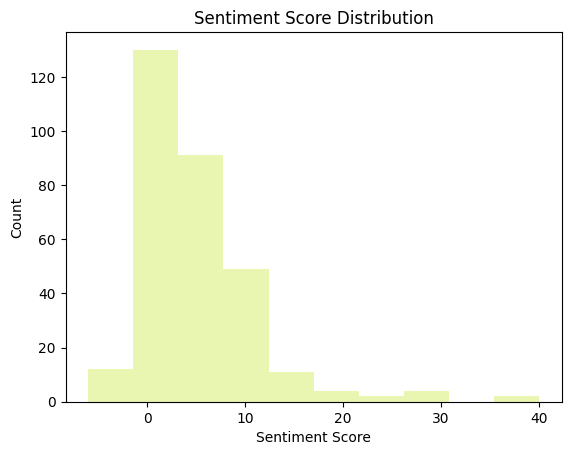

In [133]:
df['sentiment_score'].plot(kind='hist',color=pallete_color) #distribution of score among the dataset
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.title('Sentiment Score Distribution')
plt.show()

In [134]:
df.groupby(by='sentiment_score')['cleaned_headline_reviewbody'].count() #grouping the sentiment score

sentiment_score
-6.0      2
-4.0      4
-3.0      1
-2.0      5
-1.0      8
 0.0     41
 1.0      8
 2.0     19
 3.0     54
 4.0     15
 5.0     20
 6.0     46
 7.0     10
 8.0     16
 9.0     10
 10.0     8
 11.0     7
 12.0     8
 13.0     4
 14.0     2
 15.0     3
 16.0     2
 17.0     1
 20.0     3
 22.0     1
 23.0     1
 27.0     1
 28.0     1
 29.0     1
 30.0     1
 39.0     1
 40.0     1
Name: cleaned_headline_reviewbody, dtype: int64

In [135]:
#creating a new column based on
df['sentiment'] = df['sentiment_score'].apply(lambda x:'Positive' if x >0 else 'Negative')

In [136]:
df['sentiment'].value_counts() #value counts for positive and negative

sentiment
Positive    244
Negative     61
Name: count, dtype: int64

In [137]:
df.head()

,headline,reviewBody,ratingValue,pos_or_neg,Headline_ReviewBody,cleaned_headline_reviewbody,sentiment_score,sentiment
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0,1,Super light and efficient laptop Super light a...,super light effici laptop super light effici l...,8.0,Positive
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0,1,NEW laptop is great so far I am loving the new...,new laptop great far love new look feel new la...,6.0,Positive
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0,1,Lightweight powerhouse. Great build quality \ ...,lightweight powerhous great build qualiti exce...,11.0,Positive
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0,1,Great Laptop for Work Excellent laptop for wor...,great laptop work excel laptop work processor ...,5.0,Positive
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0,1,"Practical Solid Laptop So far so good, I like ...",practic solid laptop far good like ha hdmi usb...,15.0,Positive


## visualizing Top Words based on Frequency of the dataset

In [138]:
#top 20 words of cleaned_headline_reviewbody based on frequency
df['cleaned_headline_reviewbody'] = df['cleaned_headline_reviewbody'].fillna('').astype(str)
# Join all strings, split them into individual words, and get the top 20 most common words
freq = pd.Series(' '.join(df['cleaned_headline_reviewbody']).split()).value_counts()[:20]
print(freq)

laptop     282
great      153
thi        123
dell       111
veri       103
work        94
use         89
good        84
latitud     80
screen      72
perform     70
light       65
power       59
wa          57
nice        56
fast        55
ha          49
well        49
excel       48
qualiti     48
Name: count, dtype: int64


In [139]:
#calculating frequencies for each word and its occurances
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=1, max_df=0.5, ngram_range=(1, 2))
x = vect.fit_transform(df['reviewBody'])
word_freq = pd.DataFrame({ 'term': vect.get_feature_names_out(),
                          'occurances': np.asarray(x.sum(axis=0)).ravel()})
word_freq['frequency'] = word_freq['occurances'] / word_freq['occurances'].sum()
word_freq

,term,occurances,frequency
0,04,1,0.000054
1,04 on,1,0.000054
2,10,11,0.000590
3,10 and,2,0.000107
4,10 aspect,1,0.000054
...,...,...,...
8725,your users,1,0.000054
8726,zero,1,0.000054
8727,zero issues,1,0.000054
8728,zoom,1,0.000054


In [140]:
#the top 20 words from the df[reviewbody] based on frequency
top_20_words = word_freq.sort_values(by='frequency', ascending=False).head(20)
top_20_words

,term,occurances,frequency
7565,to,267,0.014328
3618,is,266,0.014274
3779,it,240,0.012879
4036,laptop,179,0.009606
5015,of,171,0.009176
2680,for,159,0.008532
8465,with,154,0.008264
7444,this,117,0.006279
8076,very,95,0.005098
3020,great,93,0.004991


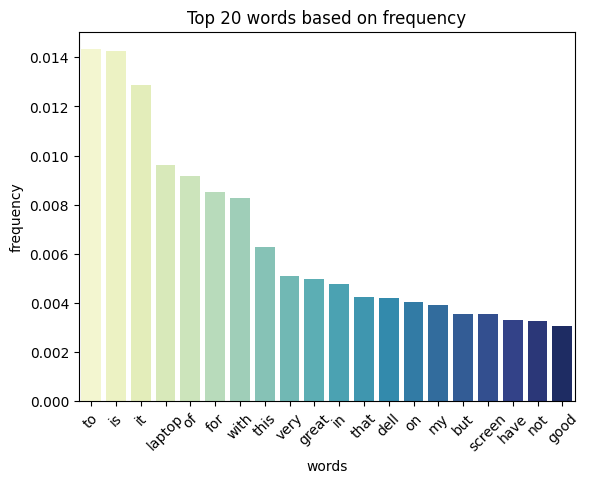

In [141]:
#bar plot for the top 20 words based on frequency
sns.barplot(x='term', y='frequency',data=top_20_words,hue='term',palette='YlGnBu')
plt.xlabel('words')
plt.ylabel('frequency')
plt.title('Top 20 words based on frequency')
plt.xticks(rotation=45)
plt.show()

# Insights from the Positive & Negative  Sentiment of the dataset

In [142]:
df_positive_sentiment = df[df['sentiment'] == 'Positive'] #creating a new dataframe with only positive scores
df_negative_sentiment = df[df['sentiment'] == 'Negative'] #creating a new dataframe with only negative scores

In [143]:
print(df_positive_sentiment.shape)
print(df_negative_sentiment.shape)


(244, 8)
(61, 8)


In [144]:
df_positive_sentiment.head()

,headline,reviewBody,ratingValue,pos_or_neg,Headline_ReviewBody,cleaned_headline_reviewbody,sentiment_score,sentiment
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0,1,Super light and efficient laptop Super light a...,super light effici laptop super light effici l...,8.0,Positive
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0,1,NEW laptop is great so far I am loving the new...,new laptop great far love new look feel new la...,6.0,Positive
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0,1,Lightweight powerhouse. Great build quality \ ...,lightweight powerhous great build qualiti exce...,11.0,Positive
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0,1,Great Laptop for Work Excellent laptop for wor...,great laptop work excel laptop work processor ...,5.0,Positive
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0,1,"Practical Solid Laptop So far so good, I like ...",practic solid laptop far good like ha hdmi usb...,15.0,Positive


### Top 20 Words in the Positive Sentiment

In [145]:
#creating a dataframe with only positive sentiment and words based on its frequency
x = vect.fit_transform(df_positive_sentiment['reviewBody'])
word_freq = pd.DataFrame({ 'term': vect.get_feature_names_out(),
                          'occurances': np.asarray(x.sum(axis=0)).ravel()})
word_freq['frequency'] = word_freq['occurances'] / word_freq['occurances'].sum()
word_freq

,term,occurances,frequency
0,04,1,0.000061
1,04 on,1,0.000061
2,10,10,0.000615
3,10 and,2,0.000123
4,10 aspect,1,0.000061
...,...,...,...
7814,your pc,1,0.000061
7815,your shoulder,1,0.000061
7816,your users,1,0.000061
7817,zoom,1,0.000061


In [146]:
#Top 20 Words in the Positive Sentiment
top_20_positive = word_freq.sort_values(by='frequency', ascending=False).head(20)
top_20_positive

,term,occurances,frequency
3261,is,238,0.014632
6786,to,231,0.014201
3405,it,199,0.012234
3625,laptop,164,0.010082
4508,of,148,0.009099
2402,for,143,0.008791
7584,with,125,0.007685
6674,this,107,0.006578
2716,great,92,0.005656
7243,very,82,0.005041


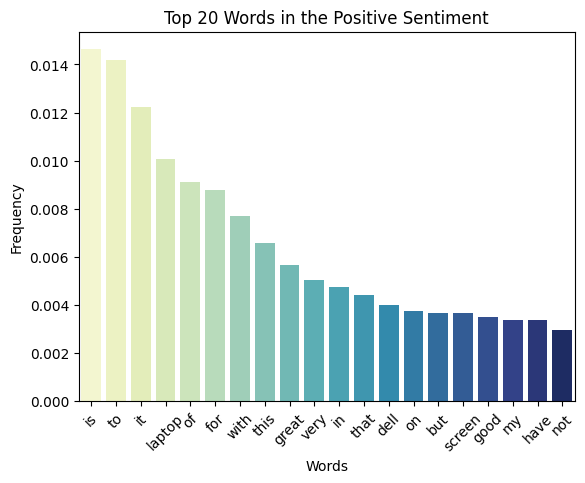

In [147]:
#barplot for the top 20 words with positive sentiment
sns.barplot(x='term', y='frequency',data=top_20_positive,hue='term',palette='YlGnBu')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words in the Positive Sentiment')
plt.xticks(rotation=45)
plt.show()

### Top 20 Words in the Negative Sentiment

In [148]:
#creating a dataframe with only negative sentiment and its occurances and frequency
x = vect.fit_transform(df_negative_sentiment['reviewBody'])
word_freq = pd.DataFrame({'term': vect.get_feature_names_out(),
                          'occurances': np.asarray(x.sum(axis=0)).ravel()})
word_freq['frequency'] = word_freq['occurances'] / word_freq['occurances'].sum()
word_freq

,term,occurances,frequency
0,10,1,0.000415
1,10 days,1,0.000415
2,11p,1,0.000415
3,2019,2,0.000829
4,2019 dell,1,0.000415
...,...,...,...
1574,you,2,0.000829
1575,you get,1,0.000415
1576,you open,1,0.000415
1577,zero,1,0.000415


In [149]:
#top 20 negative words based on frequency
top_20_negative = word_freq.sort_values(by='frequency',ascending=False).head(20)
top_20_negative

,term,occurances,frequency
58,and,43,0.017828
642,it,41,0.016998
1339,to,36,0.014925
1526,with,29,0.012023
610,is,28,0.011609
869,of,23,0.009536
805,my,18,0.007463
475,for,16,0.006633
700,laptop,15,0.006219
891,on,14,0.005804


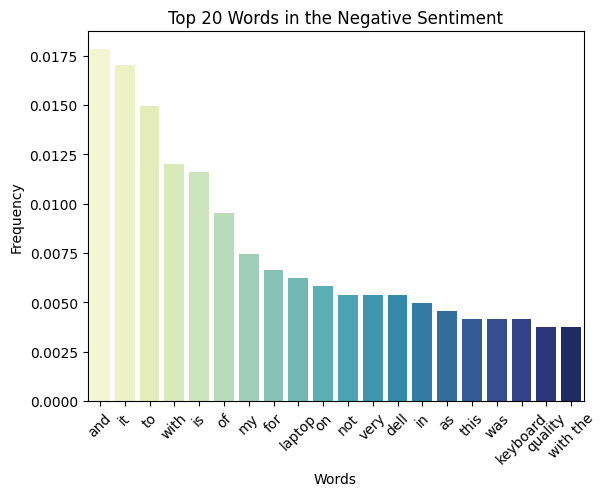

In [150]:
#barplot for the top 20 words in the negative sentiment
sns.barplot(x='term',y='frequency',data=top_20_negative,hue='term',palette='YlGnBu')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words in the Negative Sentiment')
plt.xticks(rotation=45)
plt.show()

## wordCloud for the Postive and Negative Sentime




Positve Reviews WordCloud Plot

In [151]:
#importing and creating a function which plots wordcloud image
from wordcloud import WordCloud,STOPWORDS
def gen_cloud(text):
  plt.figure(figsize=(10,10))
  plt.imshow(text,interpolation='bilinear')
  plt.axis('off')
  plt.show()

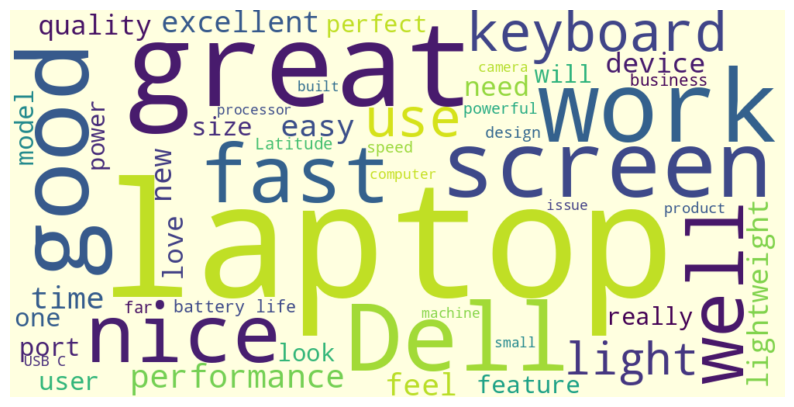

In [152]:
#wordcloud image for the positive words
text = df_positive_sentiment['reviewBody'].str.cat(sep='  ')
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='lightyellow',max_words=50,width=1000,height=500).generate(text)

gen_cloud(wordcloud)

Negative Review WordCloud Plot

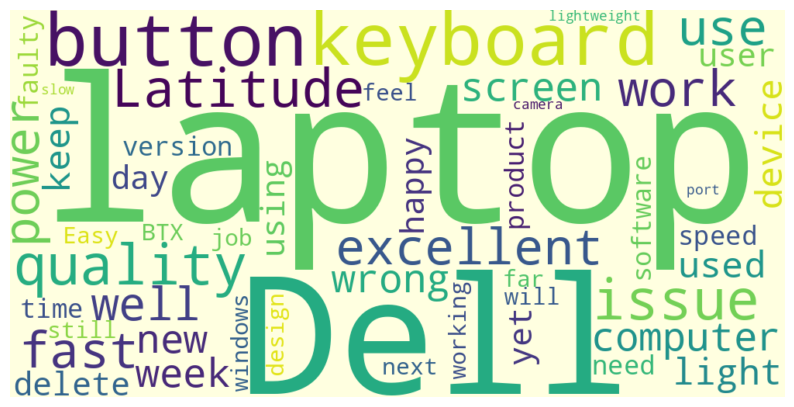

In [153]:
#wordcloud image for the negative words
text = df_negative_sentiment['reviewBody'].str.cat(sep=' ')
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='lightyellow',max_words=50,width=1000,height=500).generate(text)
gen_cloud(wordcloud)

# Bi Gram for dataset reviewBody

In [154]:
#creating a bigram that gives top 2 words in the dataset['reviewbody']
def get_top_2_words(text,n=None):
  vect = CountVectorizer(ngram_range=(2,2),max_features=2000).fit(text) #(2,2) for the bigram , (3,3) for the trigram
  bag_of_words = vect.transform(text)
  sum_of_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_of_words[0, idx]) for word, idx in vect.vocabulary_.items()]
  words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
  return words_freq

In [155]:
top_2_words = get_top_2_words(df['reviewBody'],n=200)
top_2_df = pd.DataFrame(top_2_words,columns=['bi_gram','frequency'])
top_2_df = top_2_df[:20]
print(top_2_df.shape)
top_2_df.head()

(20, 2)


,bi_gram,frequency
0,of the,46
1,with the,42
2,the laptop,40
3,this laptop,37
4,it is,35


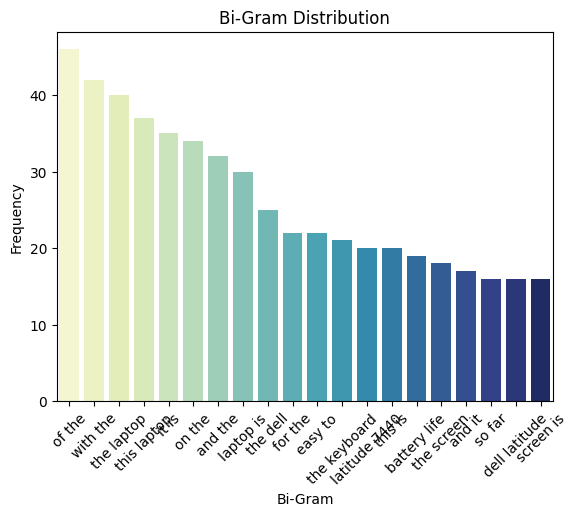

In [156]:
#bi-gram plot
sns.barplot(x='bi_gram',y='frequency',data=top_2_df,hue='bi_gram',palette='YlGnBu')
plt.xlabel('Bi-Gram')
plt.ylabel('Frequency')
plt.title('Bi-Gram Distribution')
plt.xticks(rotation=45)
plt.show()

## Tri gram for the dataset with 3 top words

In [157]:
#creating a function for the trigram
def get_top3_words(text,n=None):
  x = CountVectorizer(ngram_range=(3,3),max_features=2000).fit(text)
  bag_of_words = x.transform(text)
  sum_of_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_of_words[0, idx]) for word,idx in x.vocabulary_.items()]
  words_freq = sorted(words_freq,key=lambda x: x[1] , reverse=True)
  return words_freq

In [158]:
#creating a dataframe form the function
top_3_words = get_top3_words(df['reviewBody'],n=200)
top_3_df = pd.DataFrame(top_3_words,columns=['tri_gram','frequency'])
top_3_df = top_3_df[:20]
print(top_3_df.shape)
top_3_df.head()

(20, 2)


,tri_gram,frequency
0,this laptop is,16
1,the dell latitude,14
2,of the laptop,9
3,to carry around,9
4,dell latitude 7440,9


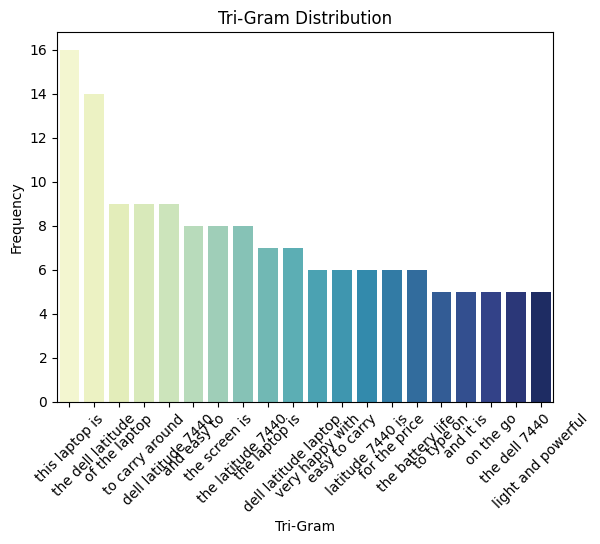

In [159]:
#tri_gram plot for the dataframe top_3_df
sns.barplot(x='tri_gram',y='frequency',data=top_3_df,hue='tri_gram',palette='YlGnBu')
plt.title('Tri-Gram Distribution')
plt.xlabel('Tri-Gram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()